# Continuous Wavelet Transform on Gravitational Wave Data

This notebook contains an example of running CWT on an example freespace gravitational waveform - in this case, the NR waveform GT0568 $\left(q = 10.0, \: |\mathbf{S}_1| = |\mathbf{S}_2| = 0\right)$, scaled to $M = 80 \: M_{\odot}$ at $d_L = 500$ [Mpc], oriented at inclination $\iota = \pi / 2$ and phase $\phi = 0$, and generated from a starting frequency of 30.0 [Hz]. See (https://arxiv.org/abs/1605.03204 and https://arxiv.org/abs/2309.00262) for further details on this waveform. The following cell loads the waveform data (also included in this repository), runs `gw_cwt.py` with the example settings, and then plots the time-frequency map.

Additionally we include an example of using the `cwt_catalog.py` script to download gravitational wave catalog data, run `gw_cwt.py` on it, then plot the time-frequency map. The catalog data are retrieved with the `get_data` function and stored in a local hdf5 file. The time-frequency map is created with the `run_cwt` function, and then appended to the hdf5. Finally, plots may be generated using the `plot_cwt` function.

## Freespace gravitational wave example

CWT done, beginning plots


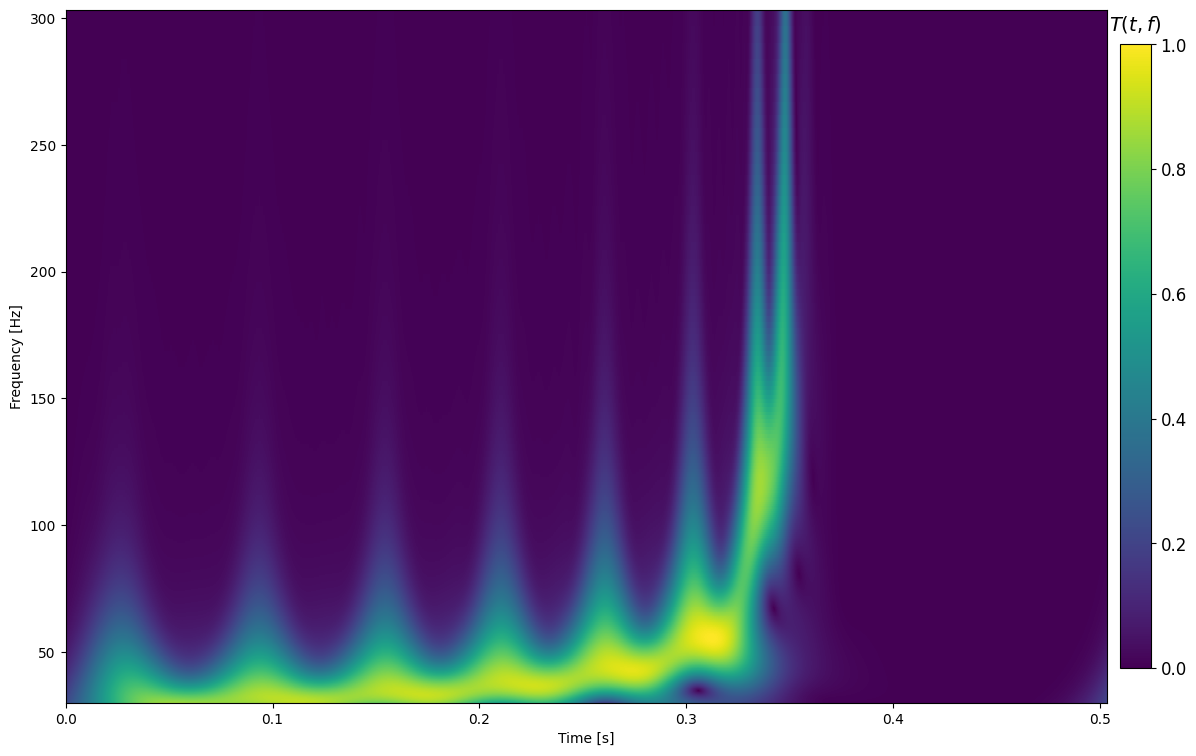

In [3]:
## GT0568 time-frequency map example ##

import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '../')
import gw_cwt

# Load waveform data
data = np.loadtxt('GT0568_edgeon_clean.txt')
sample_times = data[:,0]
signal = data[:,1]

### CWT ###
  
# Transform parameters for mother wavelet
Q = 5.0 # quality factor
chirp_rate = 0.00 # chirp param - set to zero for Morlet-Gabor wavelet
f_range = (30.0,300.0)
freq_spacing = 'Log'
n_conv = 400
cwt_result = gw_cwt.build_cwt(signal, sample_times, Q=Q, chirp_rate=chirp_rate, f_range=f_range, freq_spacing=freq_spacing, n_conv=n_conv, Norm=True)
    
wfreqs = cwt_result['frequencies'] 
fmap = cwt_result['map']
scales = cwt_result['scales']

print('CWT done, beginning plots')

#
# Plotting
#

plt.close('all')

plot_domain = [-0.1, 0.05]
plot_range = [-1.25, 1.25]

fig_size = (16,9)
#
# Spectrograms
#

fig1, ax1 = plt.subplots(figsize=fig_size, ncols=1, nrows=1)
fig1.patch.set_facecolor('white')


spec = ax1.pcolormesh(sample_times, wfreqs, fmap, rasterized=True, shading='auto', cmap='viridis', alpha = 1)

ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [s]')

clb = fig1.colorbar(spec, ax=ax1, shrink=0.9, pad=0.01)
clb.ax.tick_params(labelsize=12)
clb.ax.set_title(r'$T\left(t, f\right)$', fontsize=14, pad=10)

plt.show()

## Catalog data example

Retrieving data...
Full name for event GW150914 not entered. Set it to GW150914-v3.
Done retrieving data!
Starting to make h5py file
h5py file complete
Done! Your h5py file is located in this directory and is called cwt_data.
Starting CWT
running CWT on GW150914-v3, detector H1...
CWT done for GW150914-v3, detector H1
running CWT on GW150914-v3, detector L1...
CWT done for GW150914-v3, detector L1
Done running cwt, saving data...
Data saved
Done! Data saved to cwt_data
Done with merger GW150914-v3 at H1.


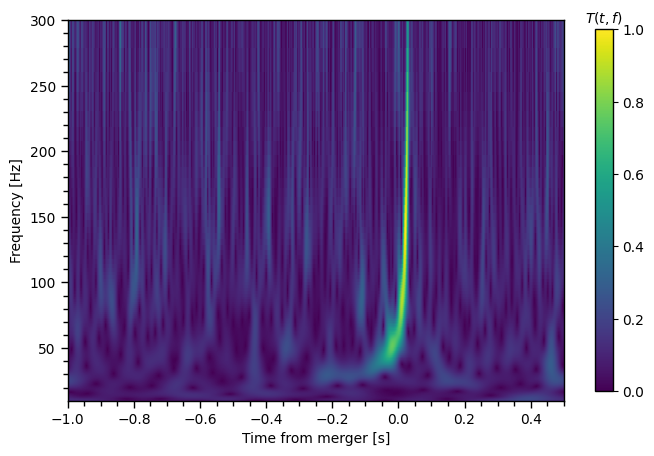

Done with merger GW150914-v3 at L1.


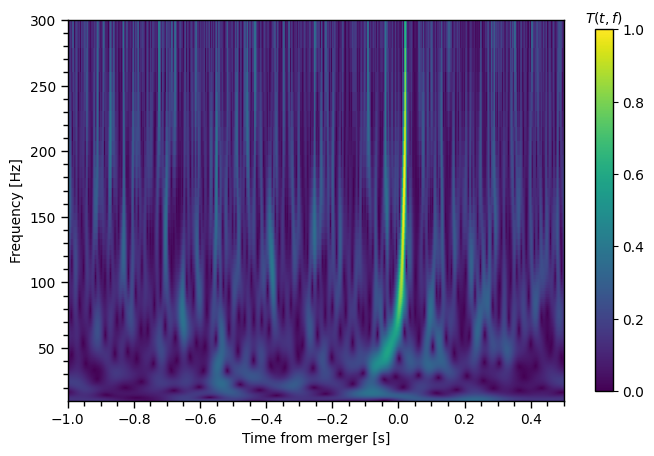

Done!


In [5]:
import gw_cwt.cwt_catalog as cwt_cat

cwt_cat.get_data(event='GW150914')
cwt_cat.run_cwt('cwt_data', Q=6.0, chirp_rate=0.0, path='', events=None, f_range=(10.0, 500.0), freq_spacing='Log', n_conv=400, df=None, da=None, f_list=None, Norm=True)
cwt_cat.plot_cwt('cwt_data', savefig=False)